In [ ]:
print('딥러닝 시작!')
# 실행 단축키 ctrl + enter : 현재 셀 실행
#             shift + enter : 현재 셀 실행 커서 다음 셀로 이동

# 셀 아래로 추가 ctrl + m + b
# 셀 위로 추가 ctrl + m + a
# 마크 다운 전환 ctrl + m + m (m을 꾹 누르면 2번 인식)
# 코드 모드로 전환 ctrl + m + y
# 셀 삭제 ctrl + m + d
# 셀 삭제 다시 되돌리기 ctrl + m + z
# 동일 단어 한꺼번에 선택 ctrl + shift + l

딥러닝 시작!


In [ ]:
# 데이터를 불러올 때 드라이브 접근
# 상대 경로를 통해서 데이터 불러오기 : 경로 이동이 필요
%cd /content/drive/MyDrive/Colab Notebooks/DeepLearning_AI2(2310)

/content/drive/MyDrive/Colab Notebooks/DeepLearning_AI2(2310)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 목표
 - 학생 수학 성적 예측하는 회귀 모델을 만들어보자
 - tensorflow.keras 활용해서 인공 신경망을 구성하는 방법을 살펴보자

In [ ]:
# 필요한 라이브러리 불러오기(환경셋팅)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__) # 언더바 두개 (던더)
# pip install tensorflow(cpu) , tensorflow-gpu(gpu)
# colab gpu 설정 : 런타임 > 런타임 유형변경 > gpu (저장)
from sklearn.model_selection import train_test_split

2.14.0


In [ ]:
# 데이터 불러오기
data = pd.read_csv('./data/student-mat.csv', delimiter=';')
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [ ]:
# 전체적인 정보 확인
data.info()
# shape(395, 33)
# 결측치 확인, 데이터 타입 확인 object, int
# 문제 : Studytime(int), 답 G3(수학성적)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

#### 데이터 분리
 - 문제: 공부시간, 정답: G3 qnsfl
 - 훈련셋과 테스트셋 분리
  - 7:3, 랜덤규칙 고정: 3
  - X_train, y_train X_test, y_test

In [ ]:
X = data["studytime"]  # 공부 시간 데이터
y = data["G3"]  # 정답 데이터

# 데이터 분할 (7:3 비율, 랜덤 시드 고정)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

print('훈련셋',X_train.shape, y_train.shape)
print('테스트셋',X_test.shape, y_test.shape)

#특성의 개수는 ? 1개
# 답 유형 ? 수치 -> 회귀 문제 푸는 딥러닝 모델 설계


훈련셋 (276,) (276,)
테스트셋 (119,) (119,)


In [ ]:
#### 신경망 모델 생성
#-1 . 모델 구조 설계
#- 2. 모델 학습/평가 방법 설정
#- 3. 모델 학습 및 학습

In [ ]:
# 딥러닝 구현 도구 불러오기
# tensorflow > keras
# 뼈대 구축 > 층 내용 정의(뉴런 개수 등..)
from tensorflow.keras import Sequential
# Sequential : 뼈대를 구축하기 위한 신경망 관련 함수
from tensorflow.keras.layers import Dense, Activation
# Dense: 신경망 층(뉴런의 묶음)을 구성하는 함수
# Activation : 활성화 함수


In [ ]:
# 1. 모델 구조 설계
# 뼈대 (골격) 정의
model = Sequential()
# 층 쌓아보기(정의)
# 입력층(자극, 특성 정보 전달 : 1) + 중간층1(뉴련 생성 개수 4)
model.add(Dense(units =4 , input_dim= 1))
model.add(Activation('sigmoid'))
# model.add(Dense(units =4 , input_dim= 1, activation = 'sigmoid'))

# 중간층
# 출력층( 회귀 vs 분류)
# units =1, activation = 'linear'(y=wx+b)
model.add(Dense(units =1))
model.add(Activation('linear'))
# model.add(Activation('linear')) 항등함수, 회귀 출력층 활성화 생략가능

# 요약 정보
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 8         
                                                                 
 activation (Activation)     (None, 4)                 0         
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
 activation_1 (Activation)   (None, 1)                 0         
                                                                 
Total params: 13 (52.00 Byte)
Trainable params: 13 (52.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# 2. 모델 / 평가 방법 설정(컴파일)
# 모델.compile()
# 분류? 회귀 0
# 회귀에 맞춰서 내용을 작성
# loss= '공식', optimizer = 'sgd'(확률적 경사하강법)
model.compile(loss = 'mse', # 오차를 걔한 : 잘맞추는지 판단
              optimizer = 'sgd') # w,b 최적의 값을 찾는 역할 (최적화함수)


In [ ]:
# 3. 모델 학습 및 시각화
h= model.fit(X_train, y_train, epochs=300)

Epoch 1/300
9/9 [==============================] - 1s 3ms/step - loss: 95.1393
Epoch 2/300
9/9 [==============================] - 0s 3ms/step - loss: 45.4463
Epoch 3/300
9/9 [==============================] - 0s 2ms/step - loss: 26.7521
Epoch 4/300
9/9 [==============================] - 0s 2ms/step - loss: 22.0236
Epoch 5/300
9/9 [==============================] - 0s 3ms/step - loss: 20.9804
Epoch 6/300
9/9 [==============================] - 0s 2ms/step - loss: 20.7599
Epoch 7/300
9/9 [==============================] - 0s 2ms/step - loss: 20.7272
Epoch 8/300
9/9 [==============================] - 0s 2ms/step - loss: 20.7416
Epoch 9/300
9/9 [==============================] - 0s 3ms/step - loss: 20.7966
Epoch 10/300
9/9 [==============================] - 0s 3ms/step - loss: 20.7332
Epoch 11/300
9/9 [==============================] - 0s 2ms/step - loss: 20.7186
Epoch 12/300
9/9 [==============================] - 0s 2ms/step - loss: 20.7308
Epoch 13/300
9/9 [==============================]

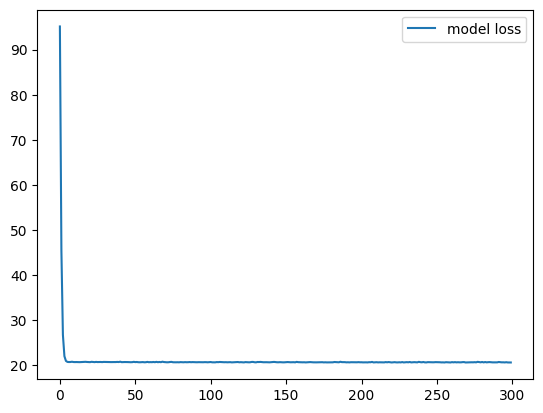

In [ ]:
# loss 값 시각화 해보기
# 1. loss 학습현황 내부 접근
loss = h.history['loss'] # 시각화에 활용
plt.plot(loss, label = 'model loss') # x 반복 횟수(300) , y loss(300개)
plt.legend() # 범례 출력
plt.show()



In [ ]:
#### 특성 2개 활용해서 신경망 생성하고 학습하기
# 공부시간 자유시간: x
# G3:y

In [ ]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [ ]:
#### 특성 2개 활용해서 신경망 생성하고 학습하기
# 공부시간 자유시간: x
# G3:y

훈련셋 (276, 2) (276,)
테스트셋 (119, 2) (119,)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 4)                 12        
                                                                 
 activation_2 (Activation)   (None, 4)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 17 (68.00 Byte)
Trainable params: 17 (68.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/150
9/9 [==============================] - 0s 2ms/step - loss: 97.5754
Epoch 2/150
9/9 [==============================] - 0s 2ms/step - loss: 47.1168
Epoch 3/150
9/9 [==============================] - 0s 2ms/step - loss: 29.2025
Epoch 

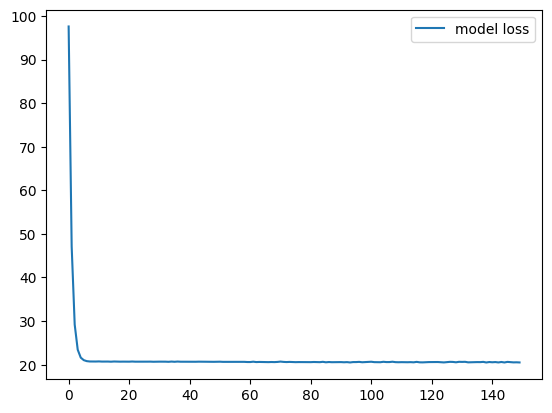

In [ ]:
X = data[["studytime", "freetime"]]  # "studytime" 및 "free time" 열 선택
y = data["G3"]  # "G3" 열 선택

# 데이터 분할 (7:3 비율, 랜덤 시드 고정)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

print('훈련셋',X_train.shape, y_train.shape)
print('테스트셋',X_test.shape, y_test.shape)

# 1. 모델 구조 설계
# 뼈대 (골격) 정의
model = Sequential()

# 층 쌓아보기(정의)
# 입력층(자극, 특성 정보 전달 : 1) + 중간층1(뉴련 생성 개수 4)
model.add(Dense(units =4 , input_dim= 2))
model.add(Activation('sigmoid'))


# 중간층
model.add(Dense(units =1))

# 요약 정보
model.summary()

# 컴파일
model.compile(loss = 'mse',
              optimizer = 'sgd')

# 3. 모델 학습 및 시각화
h= model.fit(X_train, y_train, epochs=150)

# 시각화에 활용
loss = h.history['loss']
plt.plot(loss, label = 'model loss')
plt.legend()
plt.show()

# 특성 2개를 쓴다고 해도 성능 개선 x
# 딥러닝 반복횟수가 적어도 빠르게 성능 개선을 시키는 것
# 모델 생성(뼈대 구축 > 층 내용 정의)
# 출력층 회귀: units 1, activation = 'linear' 생략 (약속)
# 모델 학습 / 평가 방법 설정 : compile()
# 회귀 loss 변경 'mse'
# 이진분류 loss 변경 : 'binary_crossentropy'
# 다중분류 loss 변경 : 'categorical_crossentropy'
# 3. 모델 학습 및 선그래프 시각화(추이 확인) : fit()
# 4. 모델 예측 및 평가 : predict(),  evaluate(문제, 답)

